# 上机作业2

In [253]:
import pandas as pd
train_valid_set = pd.read_csv("car_ins_train_valid.csv")
test_set = pd.read_csv("car_ins_test.csv")

In [254]:
train_valid_set.iloc[:5, :]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [255]:
test_set.iloc[:5, :]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [256]:
train_valid_set.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [257]:
test_set.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


- 序号`id`: 从1开始计的整数.


## 任务1.1

- (1) 除了`id`外, 哪些变量是数值变量、哪些是定类变量、哪些是定序变量?

  - **数值变量**：年龄`Age`, 年保费`Annual_Premium`, 服务天数`Vintage`

  - **定序变量**：区域编码`Region_Code`, 汽车车龄`Vehicle_Age`

  - **定类变量**：性别`Gender`, 是否有驾照`Driving_License`, 是否有过汽车保险购买经历`Previously_Insured`, 汽车是否有过损坏经历`Vehicle_Damage`, 销售渠道`Policy_Sales_Channel`, 是否有汽车保险购入的意向`Response`

- (2) 训练-验证集共有多少条数据?

  - 训练集有数据381109条，验证集由数据127037条

  - 共有数据508146条

- (3) 年保险费`Annual_Premium`和服务天数`Vintage`的取值数量级各自为多少？

  - 年保险费`Annual_Premium`的取值数量级为$10^4$

  - 服务天数`Vintage`的取值数量级为$10^2$



In [258]:
import matplotlib
from matplotlib import pyplot as plt

def visualize_data(
    data: pd.DataFrame, ax1: matplotlib.axes.Axes, ax2: matplotlib.axes.Axes, ax3: matplotlib.axes.Axes,
    numerical_col: str="Age",
    categorical_col: str="Vehicle_Age",
    label_col: str="Response"
):
    ### BEGIN YOUR SOLUTION ###
    
    # 为ax1绘制箱线图
    data[numerical_col].plot(kind="box", ax=ax1)
    ax1.set_title(f"{numerical_col} boxplot")
    ax1.set_xlabel(numerical_col)
    ax1.set_ylabel("Value")
    
    # 为ax2绘制饼图
    data[categorical_col].value_counts().plot(kind="pie", ax=ax2, autopct='%1.1f%%', ylabel="")
    ax2.set_title(f"{categorical_col} pie plot")
    
    # 为ax3绘制柱状图
    data[label_col].value_counts().plot(kind="bar", ax=ax3)
    ax3.set_title(f"{label_col} bar plot")
    ax3.set_xlabel(label_col)
    ax3.set_ylabel("Count")
    
    ### END YOUR SOLUTION ###

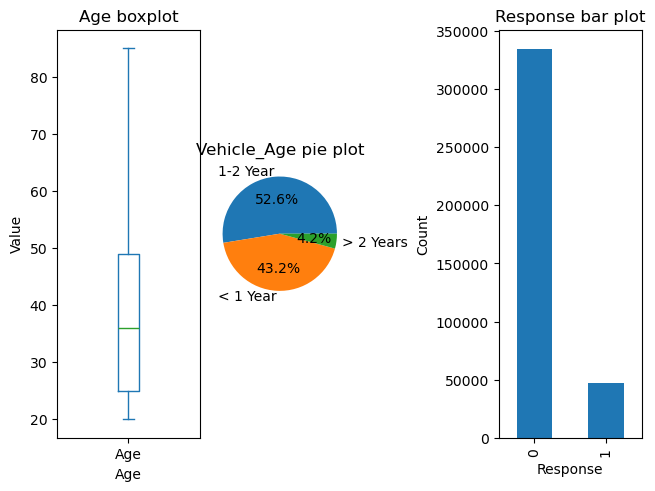

In [259]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, layout="constrained")
visualize_data(train_valid_set, ax1, ax2, ax3)
plt.show()

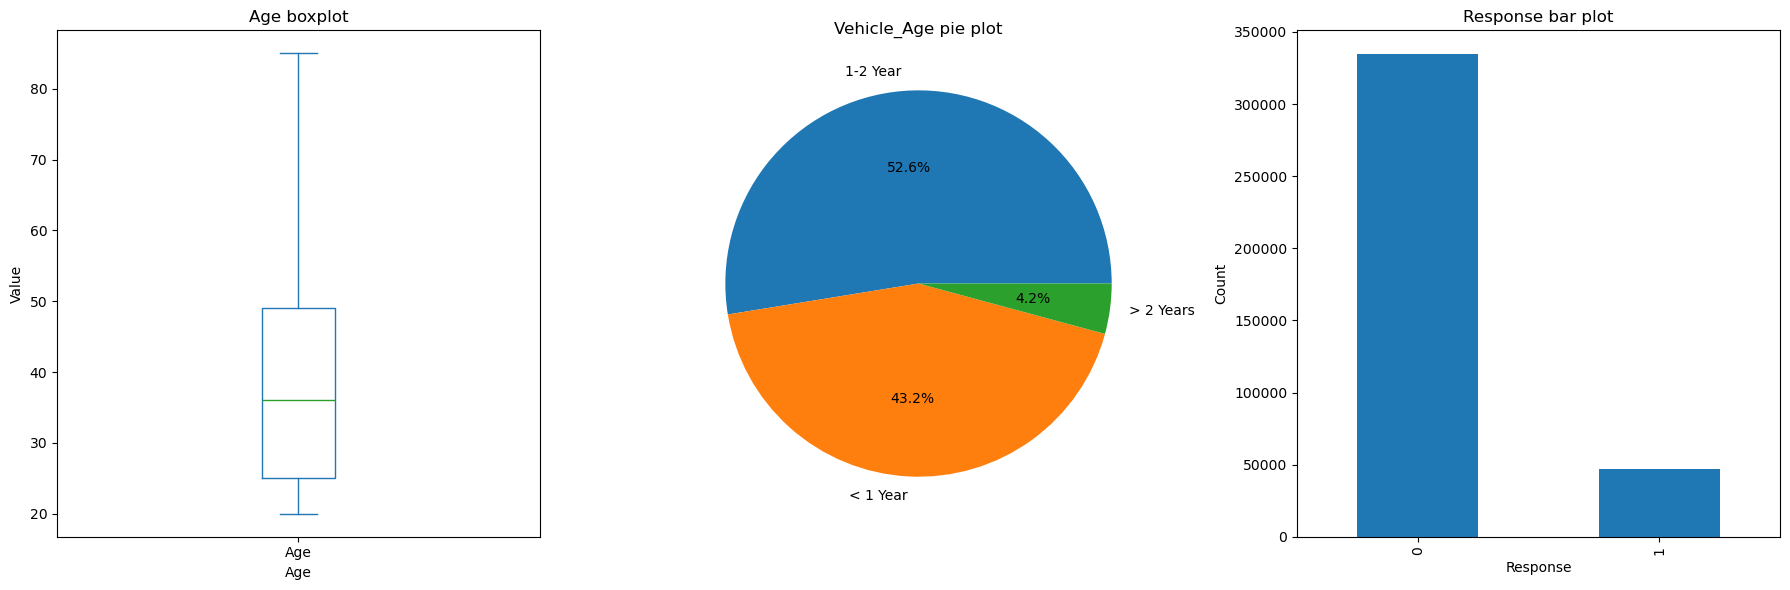

In [260]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
visualize_data(train_valid_set, ax1, ax2, ax3)
plt.tight_layout()
plt.show()

## 任务2 数据预处理

In [261]:
from typing import List, Tuple
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def preprocess_features(
    X_train: pd.DataFrame, X_valid: pd.DataFrame,
    numerical_cols: List[str]=["Age", "Annual_Premium", "Vintage"],
    ordinal_cols: List[Tuple[str, List[str]]]=[("Vehicle_Age", ["< 1 Year", "1-2 Year", "> 2 Years"])],
    nominal_cols: List[str]=["Gender", "Vehicle_Damage", "Driving_License", "Previously_Insured"],
    dropped_cols: List[str]=["id", "Region_Code", "Policy_Sales_Channel"]
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    X_train = X_train.drop(columns=dropped_cols)
    X_valid = X_valid.drop(columns=dropped_cols)

    # 处理定序变量
    for col, labels in ordinal_cols:
        X_train[col] = X_train[col].apply(lambda x: labels.index(x))
        X_valid[col] = X_valid[col].apply(lambda x: labels.index(x))

    # 处理定类变量 
    encoder = OneHotEncoder(sparse=False)
    encoder_train = encoder.fit_transform(X_train[nominal_cols])
    encoder_valid = encoder.transform(X_valid[nominal_cols])

    encoder_train_df = pd.DataFrame(encoder_train, columns=encoder.get_feature_names_out(nominal_cols), index=X_train.index)
    encoder_valid_df = pd.DataFrame(encoder_valid, columns=encoder.get_feature_names_out(nominal_cols), index=X_valid.index)
    
    X_train = pd.concat([X_train.drop(columns=nominal_cols), encoder_train_df], axis=1)
    X_valid = pd.concat([X_valid.drop(columns=nominal_cols), encoder_valid_df], axis=1)

    # 处理数值变量
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])

    return X_train, X_valid

In [262]:
X, y_true = train_valid_set.iloc[:, :-1], train_valid_set["Response"]
X_demo = X.iloc[:1000, :]
preprocess_features(X_demo, X_demo)[0]

c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Vehicle_Age,Annual_Premium,Vintage,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1,Previously_Insured_0,Previously_Insured_1
0,0.355484,2,0.542826,0.746811,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2.386823,1,0.130154,0.335298,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.545922,2,0.413978,-1.552819,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-1.104540,0,-0.163154,0.577364,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.596706,0,-0.230143,-1.407579,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.850623,0,0.587028,-0.088318,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
996,-0.469747,0,0.448993,-0.427211,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
997,-0.469747,0,-0.737721,-0.669277,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
998,0.292005,1,1.465640,0.734707,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [263]:
### CAUTION: DO NOT MODIFY THIS CELL. ###

X_train_ = train_valid_set.iloc[:1000, :-1]
X_valid_ = train_valid_set.iloc[1000:2000, :-1]
test_columns = ['Age', 'Vehicle_Age', 'Annual_Premium', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes',
       'Driving_License_0', 'Driving_License_1', 'Previously_Insured_0',
       'Previously_Insured_1']
numerical_cols = ["Age", "Annual_Premium", "Vintage"]
ordinal_cols = [("Vehicle_Age", ["< 1 Year", "1-2 Year", "> 2 Years"])]

def test_preprocess_features_columns(X_train, X_valid, test_columns):
    X_train_processed, X_valid_processed = preprocess_features(X_train, X_valid)
    assert set(X_train_processed.columns) == set(test_columns), "wrong training set column names."
    assert set(X_valid_processed.columns) == set(test_columns), "wrong validation set column names."

def test_preprocess_features_numerical(X_train, X_valid, numerical_cols):
    X_train_processed, X_valid_processed = preprocess_features(X_train, X_valid, numerical_cols=numerical_cols)
    n_features = len(numerical_cols)
    mean_train, std_train = X_train[numerical_cols].mean(axis=0), X_train[numerical_cols].std(axis=0, ddof=0)
    mean_valid, std_valid = X_valid[numerical_cols].mean(axis=0), X_valid[numerical_cols].std(axis=0, ddof=0)
    np.testing.assert_allclose(
        X_train_processed[numerical_cols].mean(axis=0), np.zeros(n_features), atol=1.0e-5,
        err_msg="invalid X_train normalization: non-zero mean."
    )
    np.testing.assert_allclose(
        X_train_processed[numerical_cols].std(axis=0, ddof=0), np.ones(n_features), rtol=1.0e-3,
        err_msg="invalid X_train normalization: non-unit std."
    )
    np.testing.assert_allclose(
        X_valid_processed[numerical_cols].mean(axis=0), (mean_valid - mean_train) / std_train, rtol=1.0e-3,
        err_msg="invalid X_valid normalization: not using training parameters."
    )
    np.testing.assert_allclose(
        X_valid_processed[numerical_cols].std(axis=0, ddof=0), std_valid / std_train, rtol=1.0e-3,
        err_msg="invalid X_valid normalization: not using training parameters."
    )

def test_preprocess_features_ordinal(X_train, X_valid, ordinal_cols):
    X_train_processed, X_valid_processed = preprocess_features(X_train, X_valid, ordinal_cols=ordinal_cols)
    for col, labels in ordinal_cols:
        for i, label in enumerate(labels):
            assert set(X_train[X_train[col] == label].index) == set(X_train_processed[X_train_processed[col] == i].index),\
                f"invalid ordinal mapping for label {label} in {col} on training set."
            assert set(X_valid[X_valid[col] == label].index) == set(X_valid_processed[X_valid_processed[col] == i].index),\
                f"invalid ordinal mapping for label {label} in {col} on validation set."

try:
    print("columns:", end=" ")
    test_preprocess_features_columns(X_train_, X_valid_, test_columns)
    print("PASSED")
except Exception as err:
    print(err)

try:
    print("numerical scaling:", end=" ")
    test_preprocess_features_numerical(X_train_, X_valid_, numerical_cols)
    print("PASSED")
except Exception as err:
    print(err)

try:
    print("ordinal mapping:", end=" ")
    test_preprocess_features_ordinal(X_train_, X_valid_, ordinal_cols)
    print("PASSED")
except Exception as err:
    print(err)

columns: PASSED
numerical scaling: PASSED
ordinal mapping: PASSED


c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 任务3.1

In [264]:
from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_valid, y_true_train, y_true_valid = train_test_split(X, y_true, test_size=test_size)
X_train, X_valid = preprocess_features(X_train, X_valid)

c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [265]:
def plot_roc(y_trues, y_scores, labels):
    from sklearn.metrics import roc_curve, roc_auc_score
    # figure setup
    plt.title("ROC curve of the Logistic Regression model")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    for y_true, y_score, label in zip(y_trues, y_scores, labels):
        # matrics preparation
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc = roc_auc_score(y_true, y_score)
        plt.plot(fpr, tpr, label=f"{label} AUC = {auc:.2f}")
    plt.legend()
    plt.show()

In [266]:
from typing import Dict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve


def evaluate_model(
    y_trues: List, y_scores: List, y_preds: List,
    labels: List[str], plot: bool=True
) -> Dict[str, List[float]]:
    ### BEGIN YOUR SOLUTION ###
    
    matrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1": []
    }

    for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
        
        matrics["accuracy"].append(accuracy_score(y_true, y_pred))
        matrics["precision"].append(precision_score(y_true, y_pred))
        matrics["recall"].append(recall_score(y_true, y_pred))
        matrics["f1"].append(f1_score(y_true, y_pred))
        
        if plot:
            plot_roc([y_true], [y_scores[i]], [labels[i]])

    print(matrics["accuracy"][0])
    return matrics
    ### END YOUR SOLUTION ###

In [267]:
### CAUTION: DO NOT MODIFY THIS CELL. ###

test_y_trues = [np.array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])]
test_y_preds = [np.array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])]
test_matrics = [0.4666666666666667, 0.5, 0.375, 0.42857142857142855]

def test_evaluate_model_keys(y_trues, y_preds, test_matrics):
    matrics = evaluate_model(y_trues, [], y_preds, [], plot=False)
    assert set(matrics.keys()) == {"accuracy", "precision", "recall", "f1"}, "wrong matrics names."

def test_evaluate_model_values(y_trues, y_preds, test_matrics):
    matrics = evaluate_model(y_trues, [], y_preds, [], plot=False)
    np.testing.assert_allclose(
        [matrics["accuracy"][0], matrics["precision"][0], matrics["recall"][0], matrics["f1"][0]], test_matrics, rtol=1.0e-3,
        err_msg="wrong matrics values."
    )

try:
    print("keys:", end=" ")
    test_evaluate_model_keys(test_y_trues, test_y_preds, test_matrics)
    print("PASSED")
except Exception as err:
    print(err)


try:
    print("values:", end=" ")
    test_evaluate_model_values(test_y_trues, test_y_preds, test_matrics)
    print("PASSED")
except Exception as err:
    print(err)

keys: 0.4666666666666667
PASSED
values: 0.4666666666666667
PASSED


## 任务3.2

In [268]:
from sklearn.linear_model import LogisticRegression
def train_and_eval(X_train, X_valid, y_true_train, y_true_valid, plot: bool=True) -> Tuple[object, Dict]:
    ### BEGIN YOUR SOLUTION ###
    
    model = LogisticRegression()
    model.fit(X_train, y_true_train)
    y_pred = model.predict(X_valid)
    y_score = model.predict_proba(X_valid)[:, 1]
    matrics = evaluate_model([y_true_valid], [y_score], [y_pred], ["Logistic Regression"], plot=plot)
    return model, matrics

    ### END YOUR SOLUTION ###

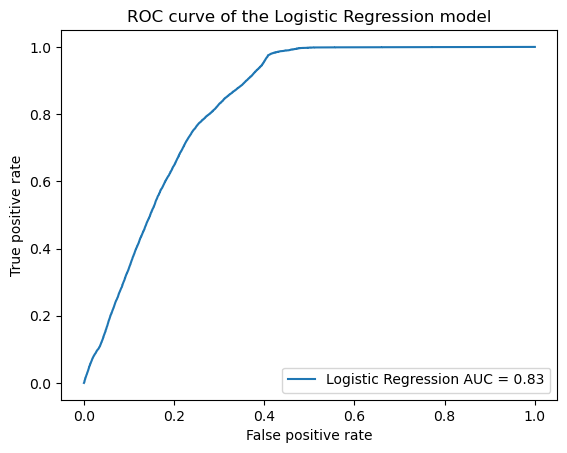

0.8777780693238173


{'accuracy': [0.8777780693238173],
 'precision': [0.2857142857142857],
 'recall': [0.0004296455424274973],
 'f1': [0.0008580008580008581]}

In [269]:
clf, metrics = train_and_eval(X_train, X_valid, y_true_train, y_true_valid)
metrics

## 任务4.1

In [270]:
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74


In [271]:
from sklearn.model_selection import KFold

def cross_validation(X, y_true, n_splits: int=5) -> Dict:
    ### BEGIN YOUR SOLUTION ###
    # 数据预处理
    X, _ = preprocess_features(X, X)
    
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X)

    matrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1": []
    }

    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_true_train, y_true_valid = y_true.iloc[train_index], y_true.iloc[valid_index]

        model, matric = train_and_eval(X_train, X_valid, y_true_train, y_true_valid, plot=False)

        for key in matric.keys():
            matrics[key].append(matric[key][0])

    return matrics

    ### END YOUR SOLUTION ###

In [272]:
cross_validation(X, y_true)

c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8762168402823332
0.8787751567788827
0.8767809818687518
0.876059405421007
0.878773566339985


{'accuracy': [0.8762168402823332,
  0.8787751567788827,
  0.8767809818687518,
  0.876059405421007,
  0.878773566339985],
 'precision': [0.2857142857142857,
  0.38461538461538464,
  0.07142857142857142,
  0.09090909090909091,
  0.13043478260869565],
 'recall': [0.00021204410517387616,
  0.0005413012882970661,
  0.00010660980810234541,
  0.00010595465140919687,
  0.00032527377209151036],
 'f1': [0.00042377370484161455,
  0.001081081081081081,
  0.00021290185224611454,
  0.00021166260979997887,
  0.0006489292667099286]}

## 任务4.2

In [273]:
X_processed = preprocess_features(X, X.iloc[:2, :])[0]
clf = LogisticRegression().fit(X_processed, y_true)
for col, value in zip(X_processed.columns, clf.coef_[0]):
    print(f"{col:25}: {value: .4f}")

c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Age                      : -0.2489
Vehicle_Age              :  0.7373
Annual_Premium           :  0.0470
Vintage                  : -0.0008
Gender_Female            : -0.0482
Gender_Male              :  0.0588
Vehicle_Damage_No        : -1.0071
Vehicle_Damage_Yes       :  1.0177
Driving_License_0        : -0.6099
Driving_License_1        :  0.6205
Previously_Insured_0     :  2.0031
Previously_Insured_1     : -1.9925


- 可以发现，热编码 `OneHotEncoder` 之后，每对参数的绝对值几乎相同，说明这些参数之间存在共线性，在实际应用中，只需要保留其中一个即可，即初始化 `OneHotEncoder(drop='first')` 。
- 买保险的意愿与年龄 `Age` 呈负相关，这说明年龄越大，越不愿意购买保险。
- 买保险的意愿与车龄 `Vehicle_Age` 呈正相关，这说明车龄越大，越愿意购买保险。
- 买保险的意愿与年保费 `Annual_Premium` 呈正相关，但相关系数较小，说明年保费越高，越愿意购买保险，但相关性不强。
- 买保险的意愿与性别 `Gender_Male` 呈正相关，与性别 `Gender_Female` 呈负相关，说明男性比女性更愿意购买保险。
- 买保险的意愿与车辆损坏经历 `Vehicle_Damage_Yes` 呈正相关，与车辆损坏经历 `Vehicle_Damage_No` 呈负相关，说明有车辆损坏经历的人更愿意购买保险。
- 买保险的意愿与是否有驾照 `Driving_License_1` 呈正相关，与是否有驾照 `Driving_License_0` 呈负相关，说明有驾照的人更愿意购买保险。
- 买保险的意愿与是否有过汽车保险购买经历 `Previously_Insured_1` 呈负相关，与是否有过汽车保险购买经历 `Previously_Insured_0` 呈正相关，说明有过汽车保险购买经历的人更不愿意购买保险。

## 任务4.3

In [274]:
def predict(clf: object, dataset_name: str) -> pd.DataFrame:
    ### BEGIN YOUR SOLUTION ###
    
    test_set = pd.read_csv(dataset_name)
    test_set = preprocess_features(test_set, test_set)[0]

    y_pred = clf.predict(test_set)
    y_score = clf.predict_proba(test_set)[:, 1]
    test_data = pd.DataFrame({"id": test_set.index, "Response": y_pred, "Probability": y_score})


    return test_data
    ### END YOUR SOLUTION ###

   
test_data = predict(clf, "car_ins_test.csv")
test_data.to_csv("car_ins_test_predictions.csv", sep="\t", index=None)

c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- 在之前的预测中，我们发现只使用多元线性回归模型，预测准确率只能达到0.877，考虑到，原有数据集中：

In [275]:
train_valid_set['Response'].value_counts()/train_valid_set.shape[0]

Response
0    0.877437
1    0.122563
Name: count, dtype: float64

其阳性率也是0.877，有根据保存到csv文件我们发现，线性模型产生了很严重的过拟合，几乎将所有的数据都预测为阳性：

In [276]:
test_data['Response'].value_counts()

Response
0    127026
1        11
Name: count, dtype: int64

为了解决这个问题，我们对于线性模型进行适当的正则化，例如使用一定的正则化强度的线性回归，例如：

In [277]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [279]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, LinearRegression
from typing import Tuple, Dict
import pandas as pd

def train_model_2(X_train, X_valid, y_true_train, y_true_valid, model_name: str="LogisticRegression") -> Tuple[object, Dict]:
    model = eval(model_name)()
    model.fit(X_train, y_true_train)

    y_pred = model.predict(X_valid)

    # 检查模型是否支持 predict_proba 方法
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_valid)[:, 1]
    else:
        # 对于不支持 predict_proba 的模型，使用预测类别的决策函数值
        y_score = model.decision_function(X_valid) if hasattr(model, "decision_function") else y_pred

    matrics = evaluate_model([y_true_valid], [y_score], [y_pred], [model_name], plot=False)
    return model, matrics

model_names = ["LogisticRegression", "RidgeClassifier", "SGDClassifier", "Perceptron", "LinearRegression"] 
matrics = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"], index=model_names)

for model_name in model_names:
    clf, metrics = train_model_2(X_train, X_valid, y_true_train, y_true_valid, model_name=model_name)
    matrics.loc[model_name] = metrics["accuracy"][0], metrics["precision"][0], metrics["recall"][0], metrics["f1"][0]

print(matrics)


0.8777780693238173
0.8778567867544803


c:\Users\11234\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\11234\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8778567867544803
0.814795378412182


ValueError: Classification metrics can't handle a mix of binary and continuous targets